In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re

/tmp/ipykernel_380013/1085524094.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Inspect training criteria

In [8]:
def get_loss(category):
    with open(f'/home/bule/projects/UTRAD/Exp0-r18-{category}/args.log', 'r') as file:
        lines = file.readlines()[19:]
        lines = [line.strip() for line in lines]
    lines_new=[float(re.findall(r"Loss:(\d+\.\d+)", item)[0]) for item in lines]
    plt.plot(lines_new),plt.title(f'training loss:  {category} '),plt.show()


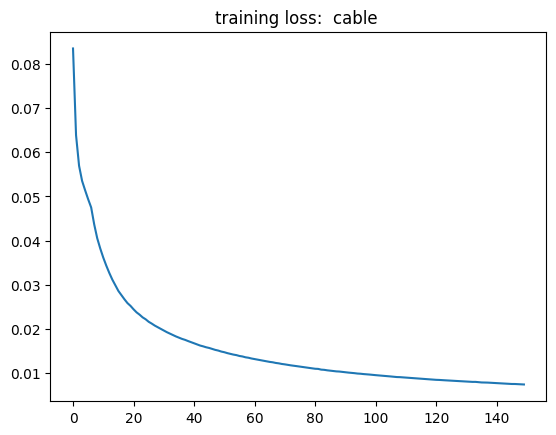

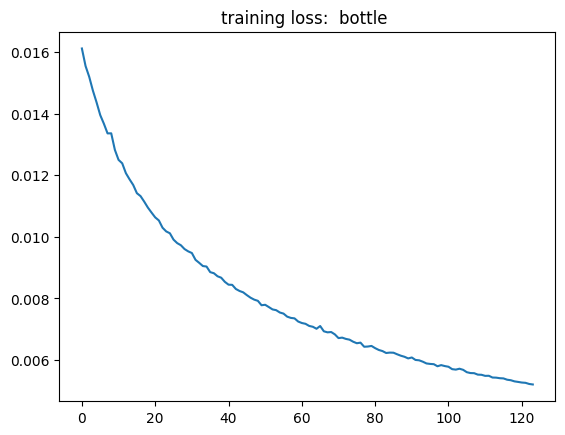

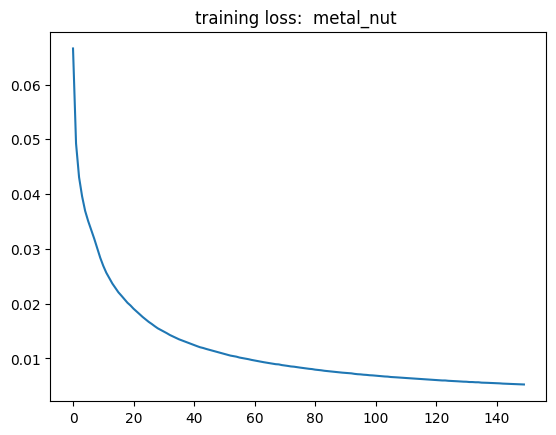

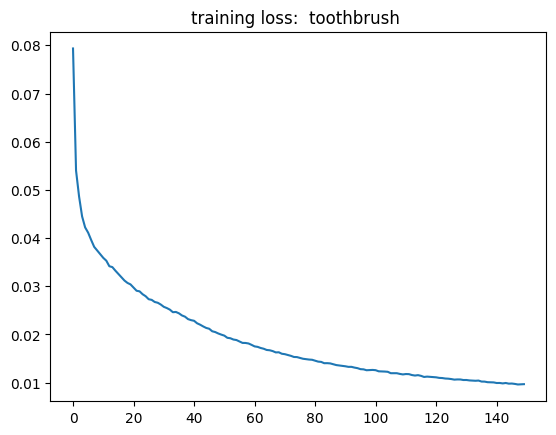

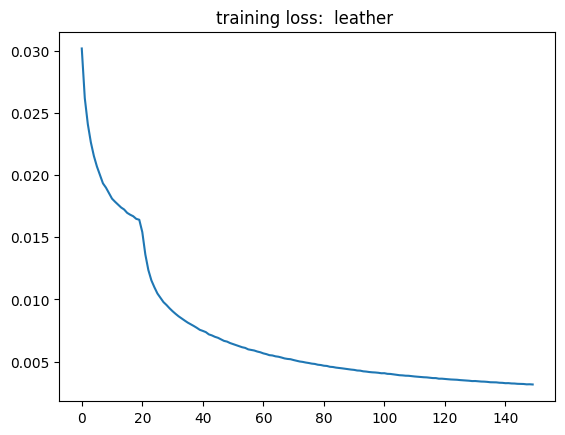

In [10]:
category='cable'
category_list=['cable', 'bottle', 'metal_nut', 'toothbrush','leather']
for category in category_list:
    get_loss(category)